<center><img src="data/itesm.png"/></center>
<h1 style='text-align: center;'><b>Maestría en Inteligencia Artificial Aplicada</b></h1>

<h2 style='text-align: center;'><b>Curso: Navegación autónoma</b></h2>
<h2 style='text-align: center;'><b>Tecnológico de Monterrey</b></h2>
<h2 style='text-align: center;'><b>Prof Titular y Tutor: Dr. David Antonio Torres</b></h2>
<h2 style='text-align: center;'><b>Prof Asistente: Maricarmen Vázquez Rojí</b></h2>

<h4 style='text-align: center;'><b>ALUMNO: </b>Luis Alfonso Sabanero Esquivel</h4>
<h4 style='text-align: center;'><b>MATRICULA: </b>A01273286</h4>
<h4 style='text-align: center;'><b>ALUMNO: </b>Jose Mtanous</h4>
<h4 style='text-align: center;'><b>MATRICULA: </b>A00169781</h4>
<h4 style='text-align: center;'><b>ALUMNO: </b> Guillermo Alfonso Muñiz Hermosillo</h4>
<h4 style='text-align: center;'><b>MATRICULA: </b>A01793101</h4>
<h4 style='text-align: center;'><b>ALUMNO: </b>Jorge Mariles Estrada</h4>
<h4 style='text-align: center;'><b>MATRICULA: </b>A01335663</h4>



<h2 style='text-align: center;'><b>Actividad de la Semana 08</b></h2>
<h2 style='text-align: center;'><b>Actividad 4.2 - Detección de Señales de Tránsito</b></h1>
<h4 style='text-align: right;'>Junio 2023</h4>
<h4 style='text-align: center;'>https://youtu.be/ksBqJ8SYV5U</h4>

In [2]:
#Cargamos las librerias necesarias para trabajar con redes neuronales
#Para esta entrega nos apoyaremos de la libreria tensorflow que ya cuenta con keras en su contenido
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import os
import imghdr

_seed = 1337
baseDir = 'data'
baseDir = '/home/jmtanous/temp'

Analizando las clases de nuestro set de entrenamiento y de pruebas, nos damos cuenta que las clases están desbalanceadas de manera similar en ambos sets, por lo pronto no vamos a hacer algo al respecto, en caso de no obtener una buen entrenamiento o validación consideraremos balancear las clases usar un esquema de entrenamiento que funcione con clases desbalanceadas.

# Entrenamiento

<Axes: xlabel='ClassId'>

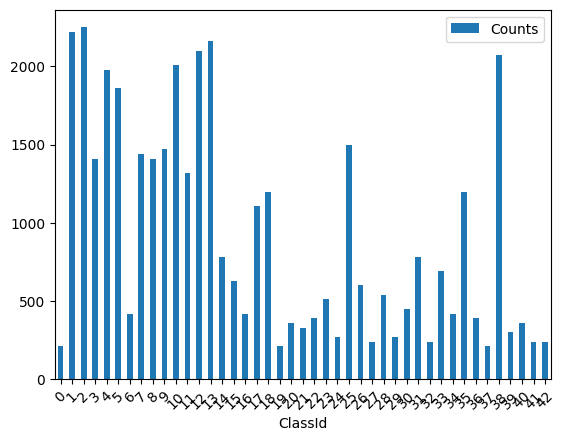

In [3]:
#Comenzamos a revisar como estan distribuidas las labels que contiene el dataset de entrenamiento
#Se componen de un csv donde se especifica como se clasifica cada imagen
#Importante dejar el csv no el directorio de imagenes, da problemas más adelante
train_metadata=pd.read_csv(baseDir + '/Train.csv')
train_metadata=train_metadata.groupby('ClassId').Width.count().reset_index().rename(columns={'Width':'Counts'})
train_metadata.plot.bar(x='ClassId', y='Counts', rot=45)

# Validación

<Axes: xlabel='ClassId'>

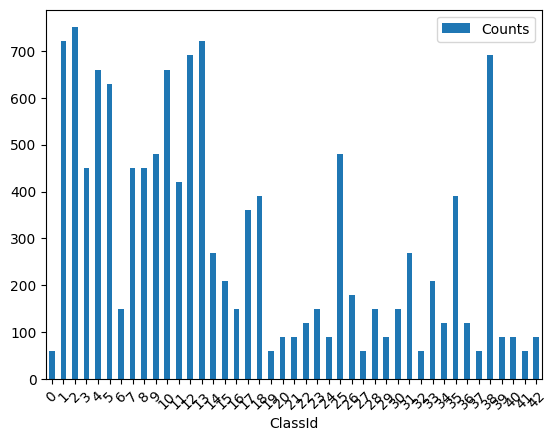

In [4]:
#Comenzamos a revisar como estan distribuidas las labels que contiene el dataset de pruebas
#Se componen de un csv donde se especifica como se clasifica cada imagen
#Importante dejar el csv no el directorio de imagenes, da problemas más adelante
train_metadata=pd.read_csv(baseDir + '/Test.csv')
train_metadata=train_metadata.groupby('ClassId').Width.count().reset_index().rename(columns={'Width':'Counts'})
train_metadata.plot.bar(x='ClassId', y='Counts', rot=45)

Enseguida comenzamos con la importacion de datos. Para el caso de google drive tenemos que montar nuestro drive para poder ver los datos de nuestro dataset. 

En caso de contar con una implementacion local, necesitamos navegar al folder donde se encuentren nuestro dataset para comenzar a trabajar.

Una vez convertidas a formato jpg, importamos nuestras imagenes a un dataset utilizando la libreria de keras la cual nos permite establecer nuestros conjuntos de entrenamiento y validacion, asi como convertir nuestras imagenes a escala de grises y definir un tamaño de imagen y de batch, todo en un mismo comando.

In [5]:
image_size = (64, 32) #Variable necesaria para hacer el resize a la imagen
batch_size = 64  #Tamaño del lote

#La funcion opera de los siguientes parametros: 
#Ruta de las imagenes, tamaño del set de entrenamiento, semilla para random, como va a determinar los labels
#las dos variables de tamaño de imagen y tamaño de lote
#En este caso el set de datos es de 43 labels, es decir multiclase, se usara categorical, no usaremos test de validació
train_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "/Train",
    validation_split=0,
    seed=_seed,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=image_size,
    batch_size=batch_size,
)

Found 39209 files belonging to 43 classes.


2023-06-09 20:10:02.387168: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-09 20:10:02.523597: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-09 20:10:02.523678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-09 20:10:02.526759: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-09 20:10:02.526813: I tensorflow/compile

Nota: El directorio de test, no cuenta con la estructura de carpetas para tensorflow. 
Aqui esta en codigo para adecuarlo a la funcion de tensorflow

In [8]:
# No ejecutar más de una vez por proyecto, hace cambios permanentes a la carpeta
# El directorio de imágenes de prueba Test no tiene la estructura para poder inferir las etiquetas
# Las etiquetas se encuentran en el archivo Test.cvs
# Intentamos usar el parámetro labels para pasarle una lista de etiquestas para crear el dataset
# sin embargo no pudimos hacer que las etiquetas funcionaran, asi que creamos un pequeño scrip para
# estructurar el directorio de pruebas de manera jerárquica y dejar que image_dataset_from_directory
# infiriera las etiquetas. Anexo el script que usamos para referencia

# import os
# import numpy as np
# import pandas as pd
# import shutil
# import imghdr
# 
# baseDir = '/home/jmtanous/temp'
# targetDir = '/home/jmtanous/temp/TestGrouped'
# 
# test_metadata=pd.read_csv(baseDir + '/Test.csv')
# y_test = []
# 
# # Navegamos el directorio Test para crear correctamente nuestra lista de etiquetas
# for root, dirs, files in os.walk(baseDir + "/TestBackup"):
#     for name in files:
#         # Solo usamos archivos de imágnes
#         if imghdr.what(os.path.join(root, name)):
#             x = test_metadata[test_metadata['Path'].str.contains(name)].ClassId.values[0]
#             targetPath = targetDir + '/' + str(x)
#             if not os.path.exists(targetPath):
#                 os.makedirs(targetPath)
#             oldName = os.path.join(root, name)
#             newName = targetPath + '/' + name
#             shutil.move(oldName,newName)

In [6]:
#Con la estructura corregida, pasamos el codigo para generar el set de pruebas. no requerimos generar set de validación
#Mantenemos el modo categorico al tener 43 labels. 
#Importante, el nombre debe corresponder a la etiqueta y debe estar en el misma carpeta con el nombre del label
test_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + '/TestGrouped',
    seed=_seed,
    validation_split=0,
    labels="inferred",
    label_mode='categorical',
    color_mode='grayscale',
    image_size=image_size,
    batch_size=batch_size,
)

Found 12630 files belonging to 43 classes.


Una vez definido nuestro conjunto de datos podemos imprimir un subconjunto de nuestras imagenes y sus etiquetas para ver la data con la que estaremos trabajando.

2023-06-09 20:10:33.902641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [39209]
	 [[{{node Placeholder/_4}}]]
2023-06-09 20:10:33.903023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [39209]
	 [[{{node Placeholder/_0}}]]


labels: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


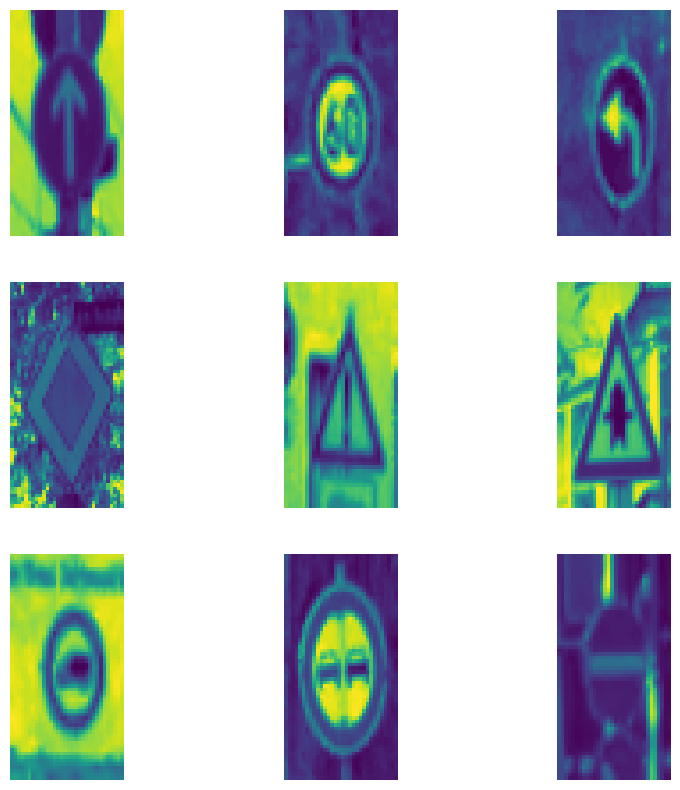

In [7]:
#Visualizamos las imagenes del data set, para validar que no haya problemas con la lectura de las imagenes
#importante considera que ahora contamos con un set grande asi que solo tomaremos una pequeña cantidad
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    print("labels: {}".format(labels))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(int(labels[i]))
        plt.axis("off")

El siguiente paso sera ahora si construir nuestra red neuronal. En este paso es necesario jugar con los parametros por lo que al final mostraremos solo el modelo que consideramos entrega los mejores parametros.

In [17]:
target_shape=(64,32)

#Dado que usamos imagenes de 64x32, esto por temas de manejo de memoria, la convolucion no requiere imagenes tan pesadas
#Todas las capas usaran el metodo de activación Relu
#La capa de salida, usara el metodo de activación softmax al ser un clasificación multiclase. Importante no olvidar la activación
#Usaremos dos capas de dropout para prevenir el sobreentrenamiento del modelo de 0.5 y una ultima de 0.1
#Se aplicara un rescaling para normalizar las entradas y un flatten para hacer que la matriz sea unidimensional la pueda leer la capa densa

#Importante: No usar un numero grande neuronas en local, problemas de memoria
model = tf.keras.Sequential([
#prepro layers
tf.keras.layers.Rescaling(1./255, input_shape=(image_size[0],image_size[1], 1)),
#training layers
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0],image_size[1], 1)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.5, seed=_seed),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.1, seed=_seed),
tf.keras.layers.Dense(43, activation="softmax"),
])

#Usaremos el metodo de optimización adam, junto con la funcion de perdida categorical crossentropy 
#La metrica de este modelo sera el accurancy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Empezamos el entrenamiento, por mejores resultados se usaron 10 epocas.
#En las pruebas se verifico que el modelo no requiere tantas epocas para resultados altos 
history=model.fit(train_ds, validation_data = test_ds, epochs = 10,)

613/613 [==============================] - 6s 9ms/step - loss: 1.4505 - accuracy: 0.6072 - val_loss: 0.5522 - val_accuracy: 0.8743
Epoch 2/10
613/613 [==============================] - 5s 8ms/step - loss: 0.3827 - accuracy: 0.8896 - val_loss: 0.3379 - val_accuracy: 0.9233
Epoch 3/10
613/613 [==============================] - 5s 8ms/step - loss: 0.2357 - accuracy: 0.9315 - val_loss: 0.3107 - val_accuracy: 0.9310
Epoch 4/10
613/613 [==============================] - 5s 9ms/step - loss: 0.1783 - accuracy: 0.9485 - val_loss: 0.2588 - val_accuracy: 0.9428
Epoch 5/10
613/613 [==============================] - 5s 8ms/step - loss: 0.1405 - accuracy: 0.9578 - val_loss: 0.2304 - val_accuracy: 0.9475
Epoch 6/10
613/613 [==============================] - 5s 8ms/step - loss: 0.1198 - accuracy: 0.9648 - val_loss: 0.2043 - val_accuracy: 0.9540
Epoch 7/10
613/613 [==============================] - 5s 8ms/step - loss: 0.1002 - accuracy: 0.9691 - val_loss: 0.2068 - val_accuracy: 0.9527
Epoch 8/10
613/61

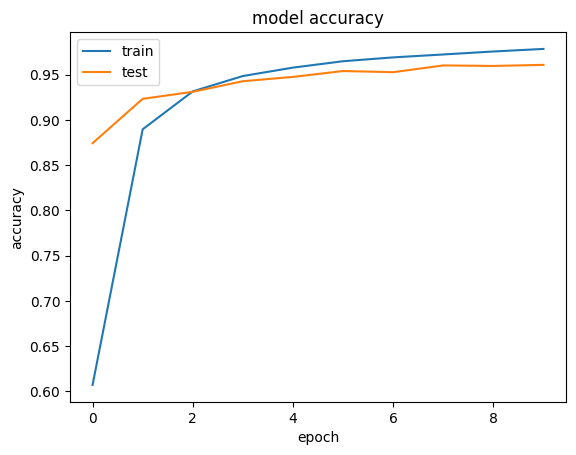

In [19]:
#Graficamos la evolución del entrenamiento 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Comparando los resultados obtenidos con el metodo de la CNN vemos que el rendimiento es superior a solo usar capas densas de neuronas. 
El proceso que usa la convolución represanta un salto importante para el procesamiento de imagenes.
En este caso el entrenamiento y validacion con los set de test y train. Demuestran una buena generalización con un 97% y 96% repectivamente
lo que indica que no tienen sobreentrenamiento este modelo 